In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

### 1. EDA 및 데이터 전처리

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(506, 14)

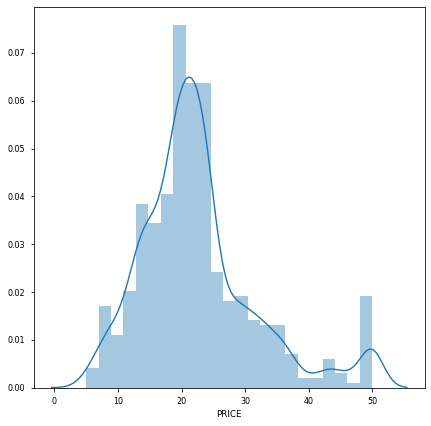

In [4]:
bostonDF['PRICE'] = boston.target

plt.subplots(figsize=(7,7))
sns.distplot(bostonDF['PRICE'])

bostonDF.shape

In [5]:
bostonDF.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
bostonDF.corr().style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


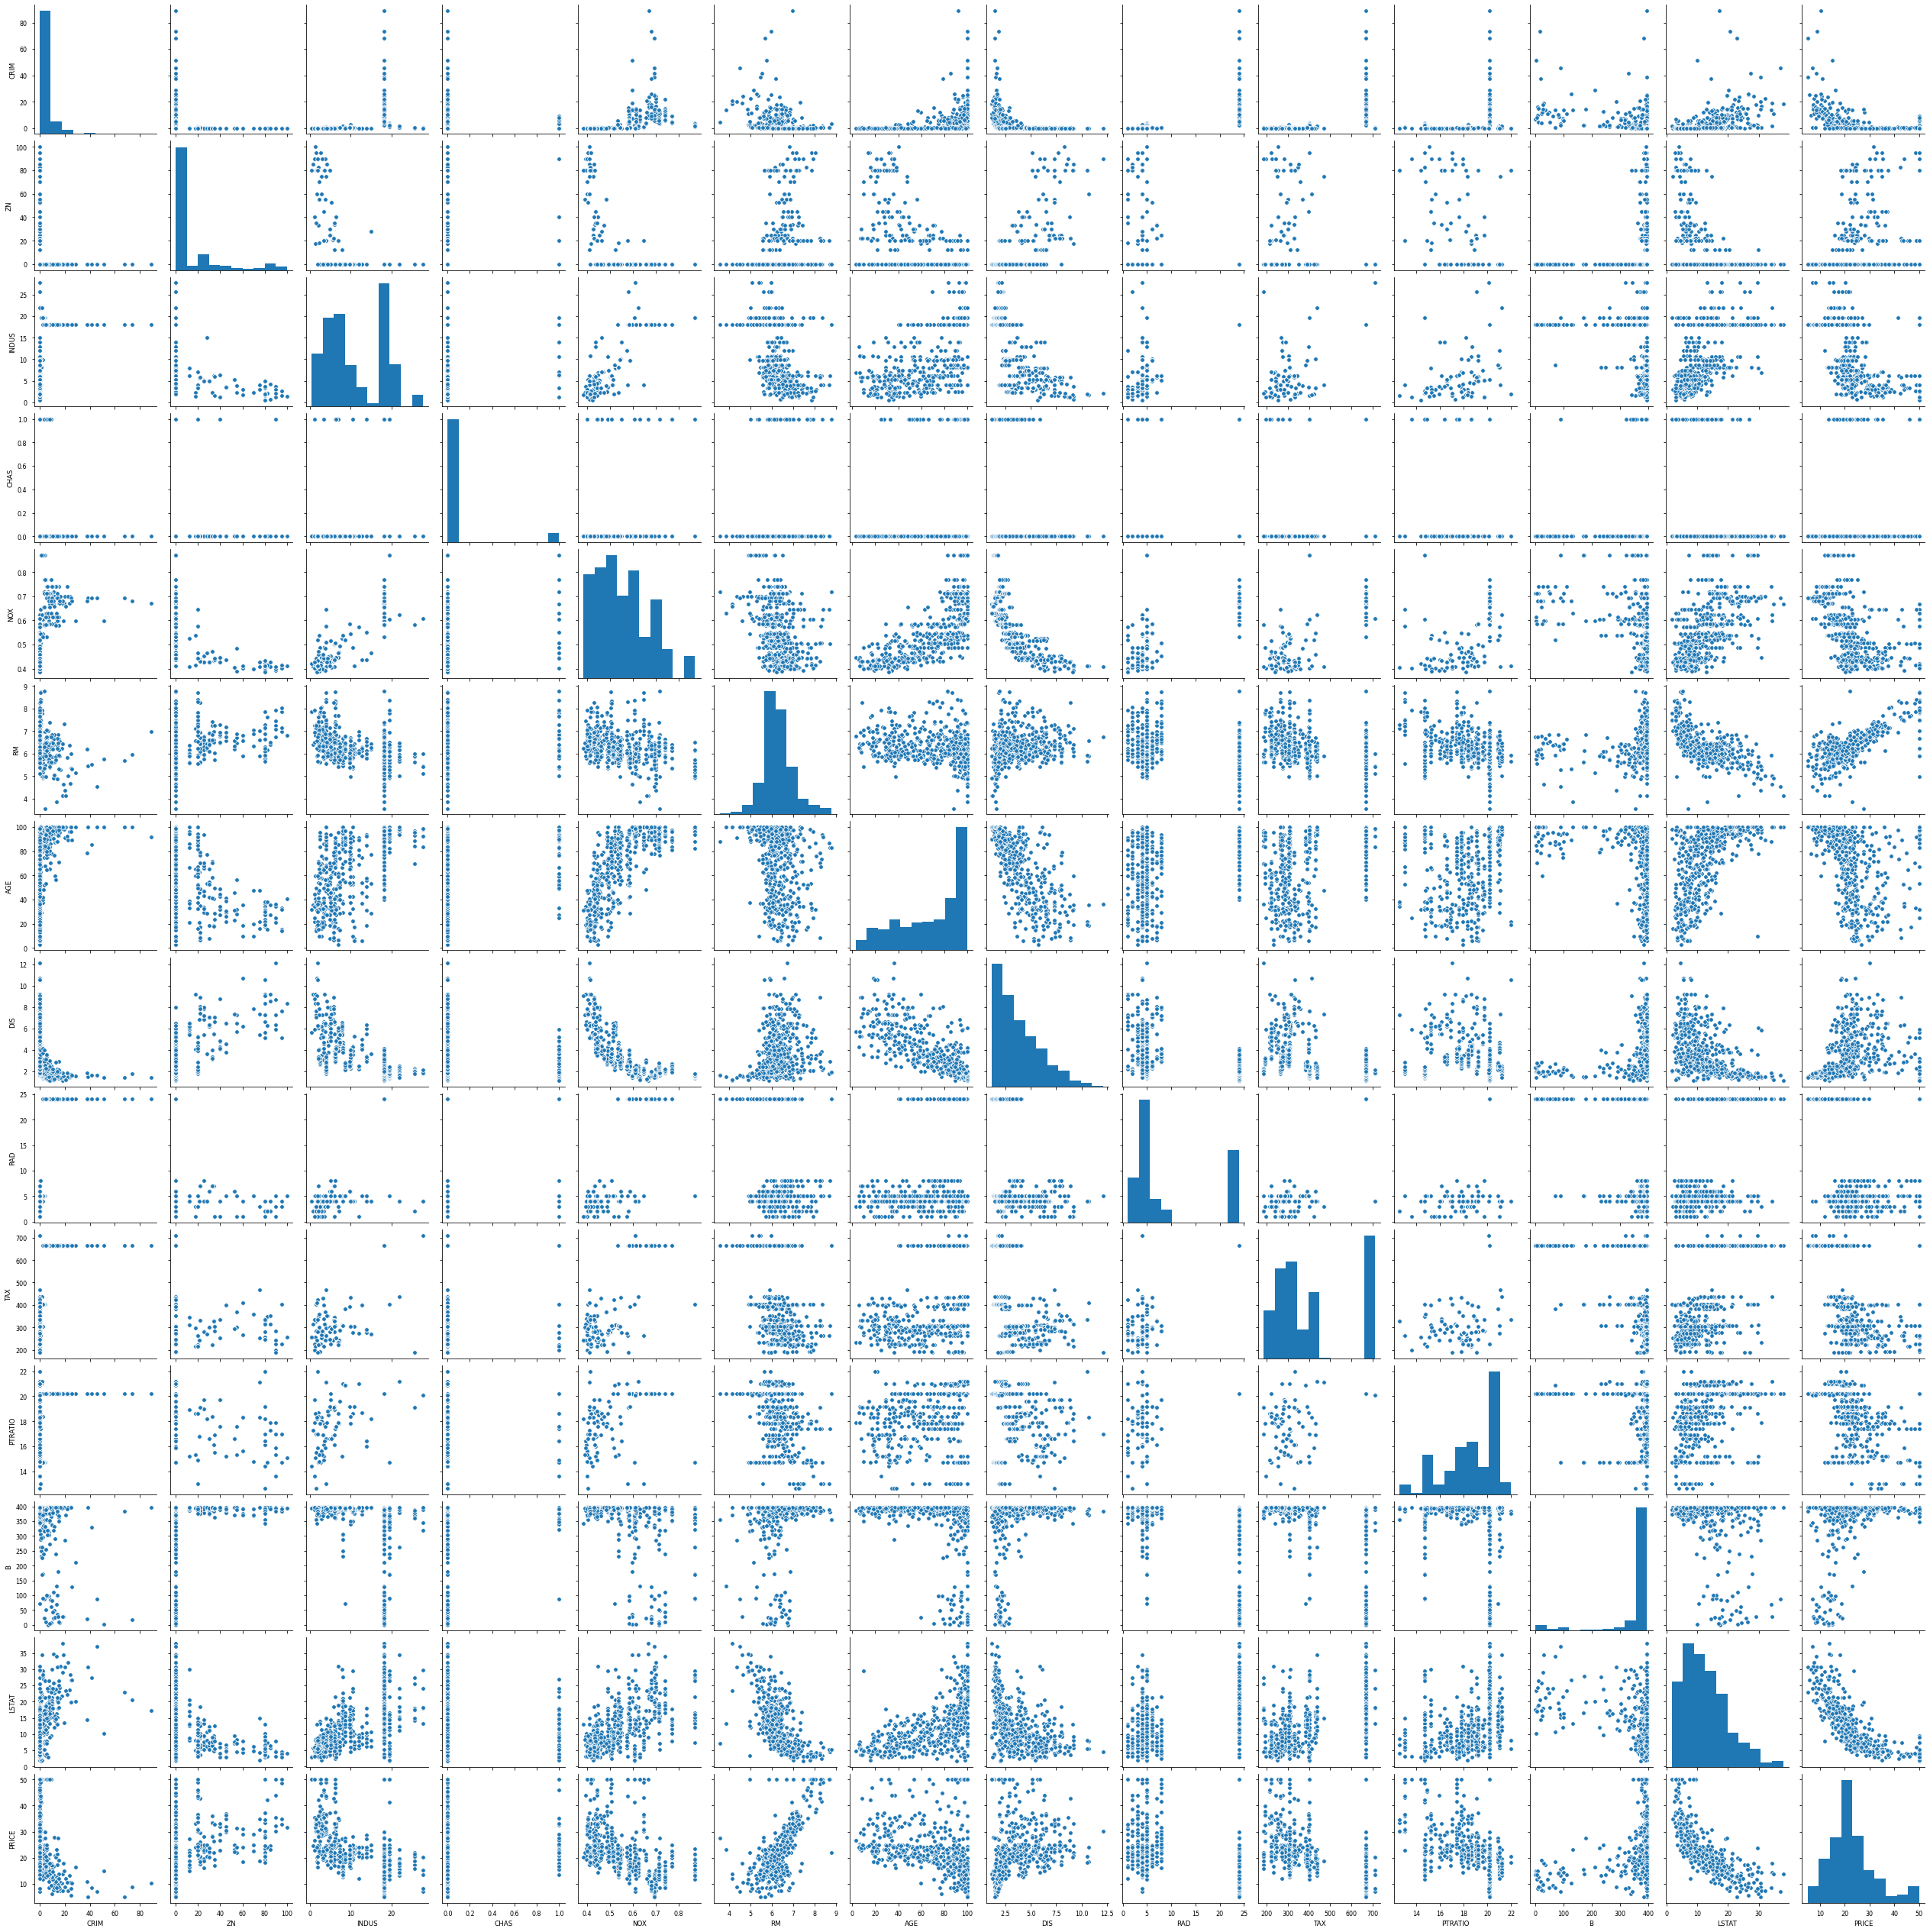

In [9]:
sns.pairplot(bostonDF)

: 변수 간 다중공선성이 존재. 모델링 시 feature 처리 필요

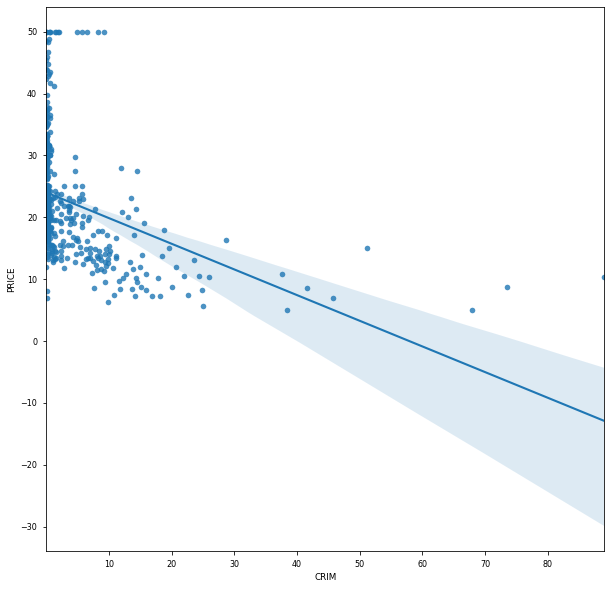

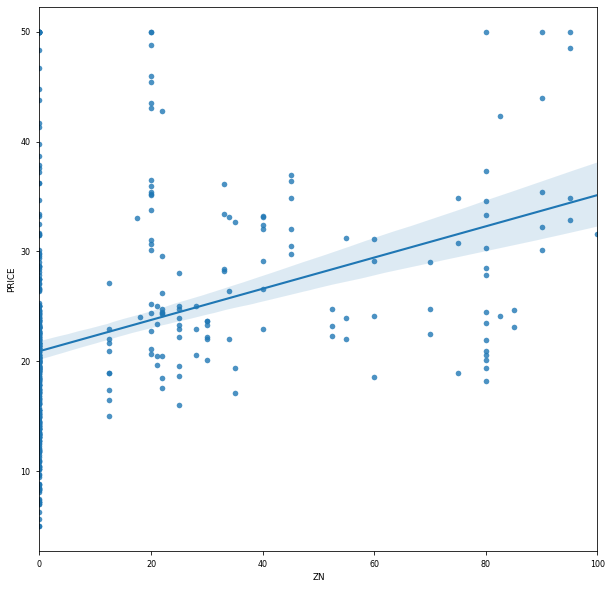

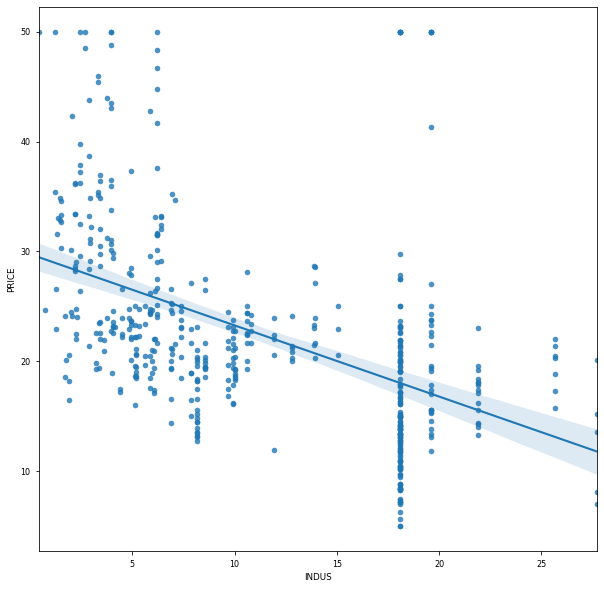

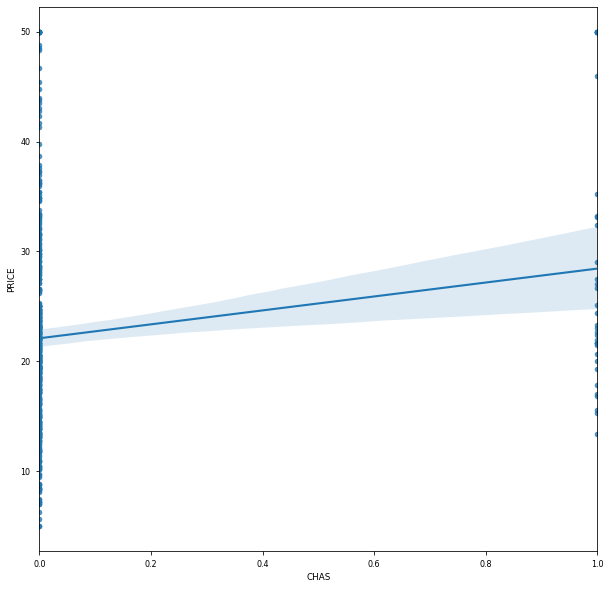

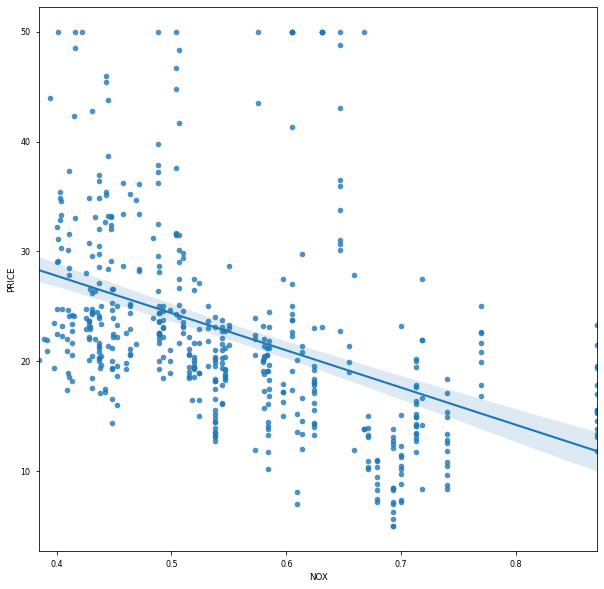

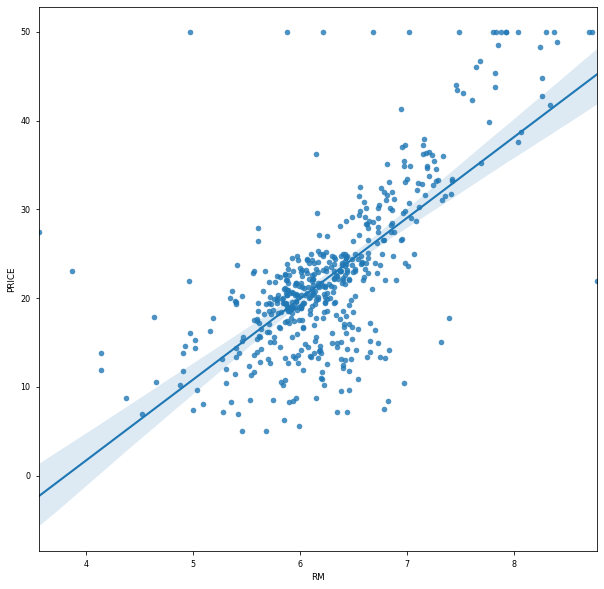

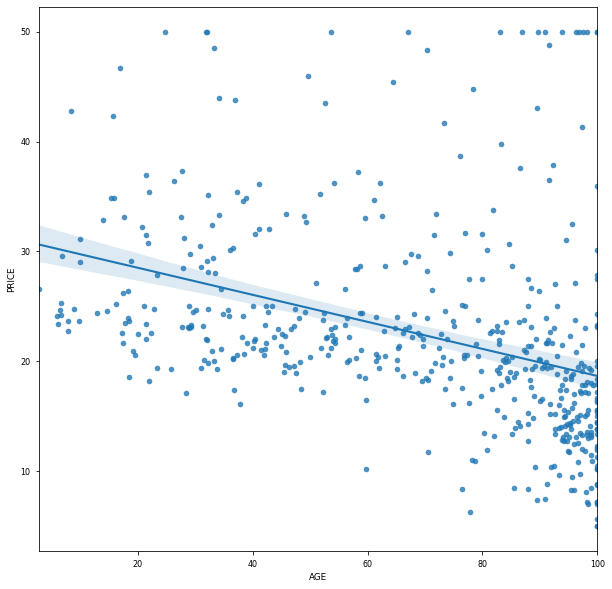

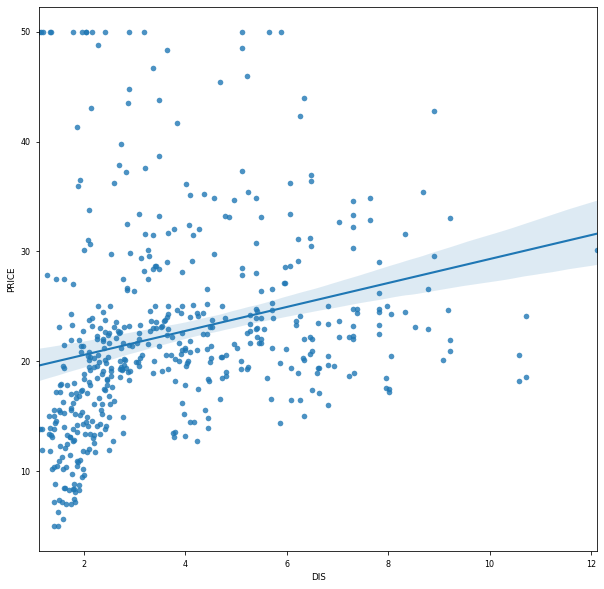

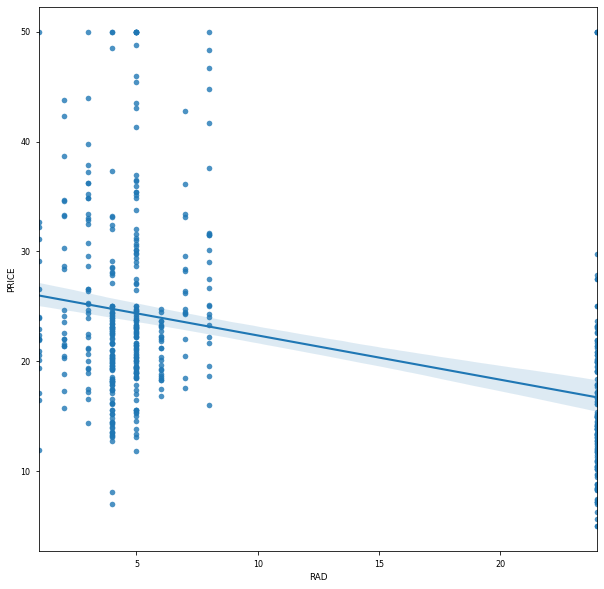

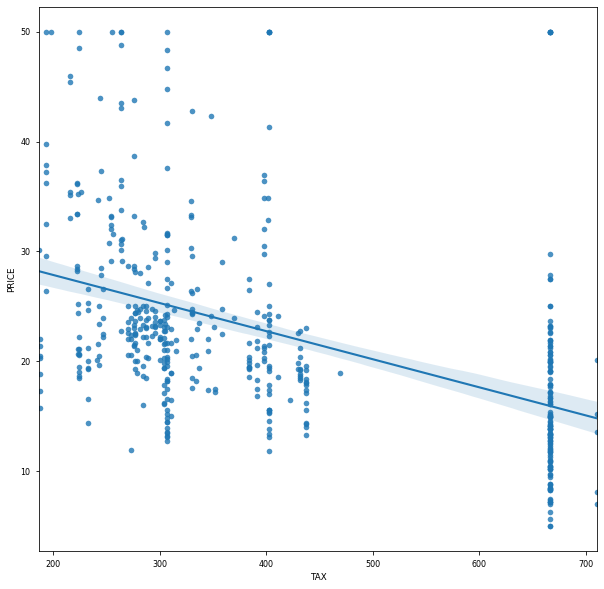

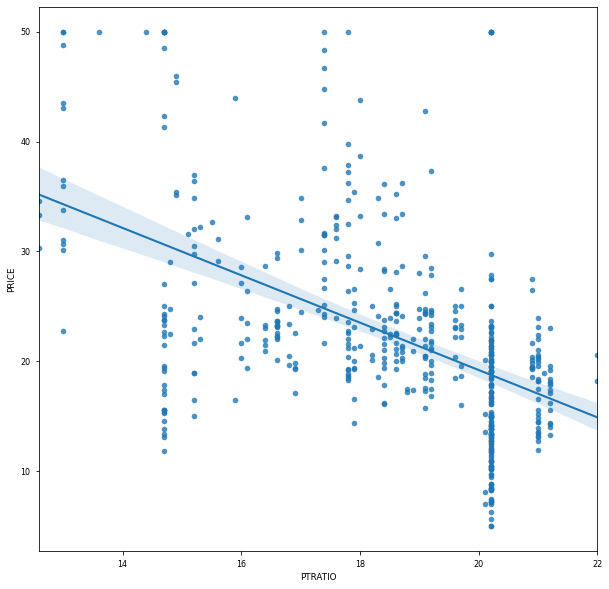

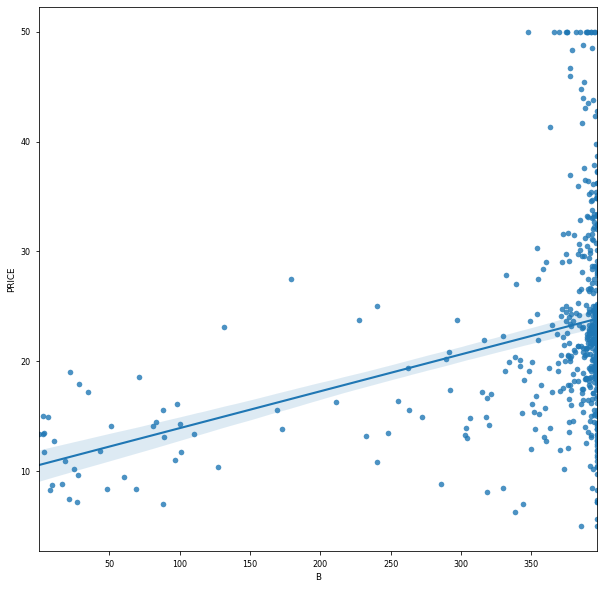

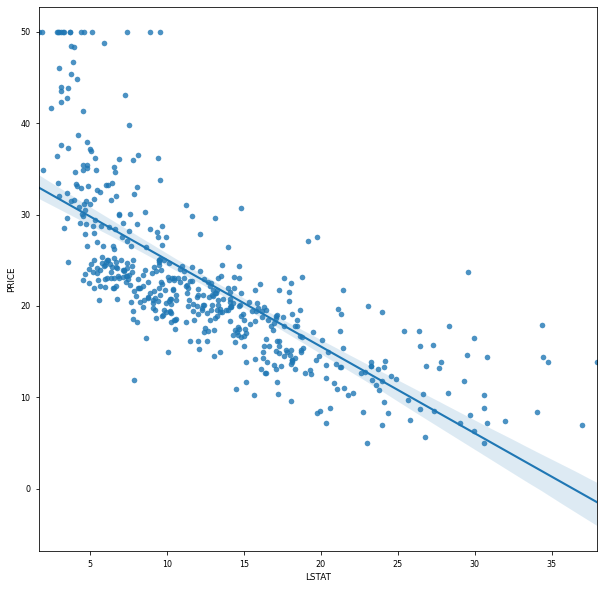

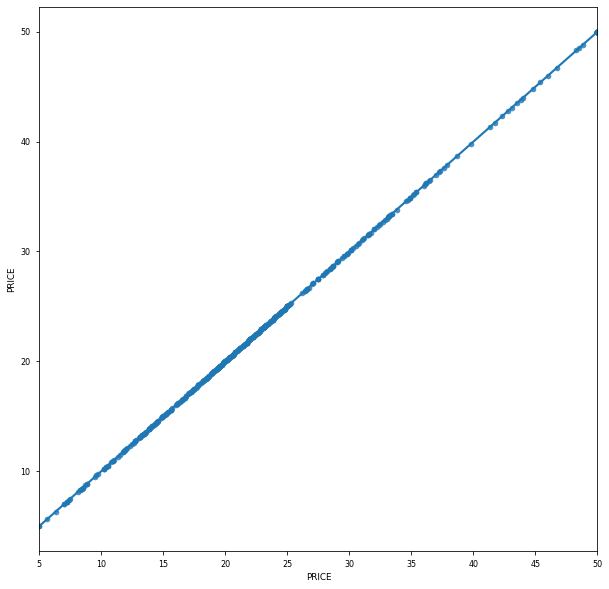

In [10]:
for feature in bostonDF.columns:
    plt.subplots(figsize=(10,10))
    sns.regplot(x=feature, y='PRICE', data=bostonDF)

### 2.  Train / Valid / Test set으로 데이터 분할하고 시각화

In [11]:
from sklearn.model_selection import train_test_split


X = bostonDF.drop('PRICE', axis=1)
y = bostonDF.PRICE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

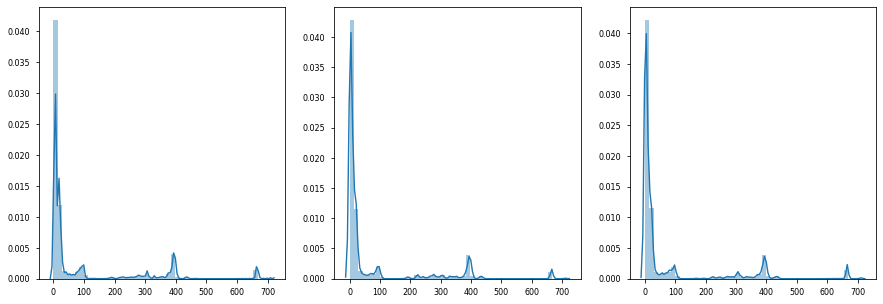

In [12]:
fig, ax=plt.subplots(figsize=(15,5), ncols=3)

for i, data in enumerate([X_train, X_valid, X_test]):
    sns.distplot(data, ax=ax[i])  

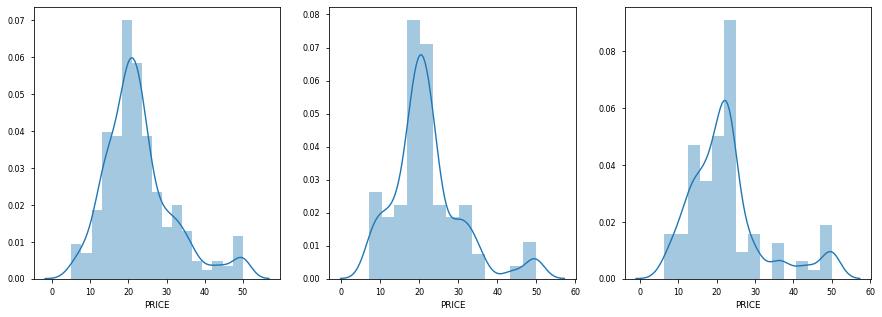

In [13]:
fig, ax=plt.subplots(figsize=(15,5), ncols=3)

for i, data in enumerate([y_train, y_valid, y_test]):
    sns.distplot(data, ax=ax[i])  

### 3. 2차 교호작용항까지 고려한 회귀분석 수행 및 변수 선택 과정

### - 다변량 회귀분석 단계

    1. 다변량 모형에 대한 가설검정 실시
    2. 각 변수의 계수에 대한 가설검정 실시
    3. 결정계수를 통한 모형에 대한 설명력 확인
    4. 다중공선성의 확인을 통한 모형의 안정성 확인
    5. 잔차분석을 통한 다변량 회귀분석의 가정 확인 

In [14]:
import statsmodels.api as sm

multi_model = sm.OLS(y_train, X_train)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              504.9
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                   8.36e-200
Time:                        03:50:51   Log-Likelihood:                         -989.70
No. Observations:                 323   AIC:                                      2005.
Df Residuals:                     310   BIC:                                      2055.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0994      0.040     -2.517      0.012      -0.177      -0.022
ZN             0.0652      0.020      3.318      0.001       0.027       0.104
INDUS          0.0029      0.084      0.034      0.973      -0.163       0.169
CHAS           2.3721      1.136      2.087      0.038       0.136       4.608
NOX           -3.2137      4.553     -0.706      0.481     -12.172       5.745
RM             5.3440      0.413     12.931      0.000       4.531       6.157
AGE            0.0053      0.019      0.286      0.775      -0.031       0.042
DIS           -0.8800      0.266     -3.312      0.001      -1.403      -0.357
RAD            0.1420      0.095      1.488      0.138      -0.046       0.330
TAX           -0.0071      0.006     -1.255      0.210      -0.018       0.004
PTRATIO       -0.2337      0.145     -1.607      0.109      -0.520       0.052
B              0.0137      0.004      3.771      0.000       0.007       0.021
LSTAT         -0.4587      0.069     -6.664      0.000      -0.594      -0.323
==============================================================================
Omnibus:                      141.973   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.203
Skew:                           1.710   Prob(JB):                    2.22e-193
Kurtosis:                      10.363   Cond. No.                     8.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1단계) Prob (F-statistic) = 8.36e-200 <0.05 로 유의수준 5%하에서 대립가설 채택. 즉 추정된 회귀모형은 통계적으로 매우 유의함  
2단계) 각 변수의 계수값들 확인 시 유의수준 5%g하에서 INDUS, NOX, AGE, RAD, TAX, PTRATIO 의 경우 통계적으로 유의하지 않음.   
3단계) 결정계수 R2값이 0.955로 해당 모형이 데이터의 95.5%를 설명한다고 해석할 수 있음  
4단계) 다중공선성이 큰 변수들 존재함 => 변수를 줄일 필요가 있음  

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(boston.data, i) for i in range(boston.data.shape[1])]
vif=vif.set_index(boston.feature_names)

vif[vif['VIF Factor']>10]

,VIF Factor
INDUS,14.485758
NOX,73.894947
RM,77.948283
AGE,21.386850
DIS,14.699652
RAD,15.167725
TAX,61.227274
PTRATIO,85.029547
B,20.104943
LSTAT,11.102025


5단계) 잔차분석 시 양 끝 단의 경우 완전한 정규성을 띄지 않음

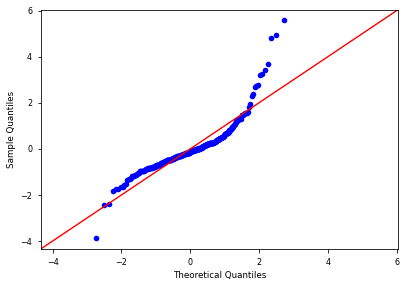

In [16]:
# qq plot을 통해 잔차의 정규분포 확인

res=fitted_multi_model.resid
fig = sm.qqplot(res, fit=True, line='45')

- 변수 선택법

    1. 전진선택법(Forward Selection)

    2. 후진소거법(Backward Elimination)

    3. 단계적선택법(Stepwise Selection)
    
    4. 반복적 특성 선택(RFE, Recursive feature elimination)

In [17]:
# 1. 전진 선택법 

variables = X_train.columns.tolist() ## 설명 변수 리스트
 
y = y_train ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
        
forward_features = selected_variables
forward_features

['LSTAT', 'PTRATIO', 'RM', 'DIS', 'NOX', 'ZN', 'CHAS', 'CRIM', 'RAD']

In [20]:
# 4. RFE 활용 (sm.OLS 를 지원하지 않음)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
select = RFE(lr)
rfe_fit = select.fit(X_train, y_train)

mask = select.get_support()
rfe_features = X_train.columns[mask]
rfe_features

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import KFold, cross_val_score


min_max = MinMaxScaler()
poly = PolynomialFeatures(degree=2)
lr=LinearRegression()

pipeline = Pipeline([('scaler',  min_max),
                     ('polynomial_features', poly), 
                     ('linear_regression', lr)])


forward_poly=pipeline.fit(X_train[forward_features], y_train)
forward_poly_predict = forward_poly.predict(X_valid[forward_features])

forward_poly_result_RMSE = np.sqrt(mean_squared_error(y_valid, forward_poly_predict))
forward_poly_result_RMSLE = np.sqrt(mean_squared_log_error(y_valid, forward_poly_predict))
forward_poly_result_R2 = r2_score(y_valid, forward_poly_predict)

print('생성된 다항변수', poly.get_feature_names())

print('forward_poly_RMSE:', forward_poly_result_RMSE)
print('forward_poly_RMSLE:',forward_poly_result_RMSLE)
print('forward_poly_R2:', forward_poly_result_R2)


생성된 다항변수 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x6^2', 'x6 x7', 'x6 x8', 'x7^2', 'x7 x8', 'x8^2']
forward_poly_RMSE: 3.7854156324955266
forward_poly_RMSLE: 0.22727135496938652
forward_poly_R2: 0.8172878888086347


In [23]:
rfe_poly=pipeline.fit(X_train[rfe_features], y_train)
rfe_poly_predict = rfe_poly.predict(X_valid[rfe_features])

rfe_poly_result_RMSE = np.sqrt(mean_squared_error(y_valid, rfe_poly_predict))
rfe_poly_result_RMSLE = np.sqrt(mean_squared_log_error(y_valid, rfe_poly_predict))
rfe_poly_result_R2 = r2_score(y_valid, rfe_poly_predict)

print('생성된 다항변수', poly.get_feature_names())

print('rfe_poly_RMSE:', rfe_poly_result_RMSE)
print('rfe_poly_RMSLE:',rfe_poly_result_RMSLE)
print('rfe_poly_R2:', rfe_poly_result_R2)


생성된 다항변수 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x3^2', 'x3 x4', 'x3 x5', 'x4^2', 'x4 x5', 'x5^2']
rfe_poly_RMSE: 5.6112651243989795
rfe_poly_RMSLE: 0.33492751897328
rfe_poly_R2: 0.5985219822390198


In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import KFold, cross_val_score


min_max = MinMaxScaler()
poly = PolynomialFeatures(degree=2)
lr=LinearRegression()

pipeline = Pipeline([('scaler',  min_max),
                     ('pdifferenceolynomial_features', poly), 
                     ('linear_regression', lr)])


base_poly = pipeline.fit(X_train, y_train)
poly_predict = base_poly.predict(X_valid)

poly_result_RMSE = np.sqrt(mean_squared_error(y_valid, poly_predict))
poly_result_RMSLE = np.sqrt(mean_squared_log_error(y_valid, poly_predict))
poly_result_R2 = r2_score(y_valid, poly_predict)

print('생성된 다항변수', poly.get_feature_names())

print('poly_RMSE:', poly_result_RMSE)
print('poly_RMSLE:',poly_result_RMSLE)
print('poly_R2:', poly_result_R2)


생성된 다항변수 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']
poly_RMSE: 3.863158908235345
poly_RMSLE: 0.184308571876647


In [25]:
lr_model=lr.fit(X_train, y_train)
lr_predict = lr.predict(X_valid)

lr_result_RMSE = np.sqrt(mean_squared_error(y_valid, lr_predict))
lr_result_RMSLE = np.sqrt(mean_squared_log_error(y_valid, lr_predict))
lr_result_R2 = r2_score(y_valid, lr_predict)


print('lr_RMSE:', lr_result_RMSE)
print('lr_RMSLE:',lr_result_RMSLE)
print('lr_R2:', lr_result_R2)

lr_RMSE: 4.634238667238843
lr_RMSLE: 0.235966160432473
lr_R2: 0.7261599367987422


### 4. 벌점, 앙상블을 포함해서 그 외 모형에 적합한 기계학습 모델을 3가지 생성하고 모델 최적화 과정 (MSE,MAPE, R2를 제시해야함)

In [26]:
from sklearn.ensemble import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




ImportError: cannot import name 'DecisionTreeRegressor' from 'sklearn.ensemble' (C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)